In [1]:
import os
import sys

# Add the parent directory to the path to use the modules
sys.path.append(os.path.dirname(os.getcwd()))

In [5]:
# Import the custom modules
from src.model import VAE
from src.model import GAN

import torch
from matplotlib import pyplot as plt

In [13]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("Using {} device".format(device))

Using cpu device


In [15]:
random_samples = torch.randn(81, 128).to(device)
one_sample = torch.randn(1, 128).to(device)

In [16]:
vae = VAE().to(device)
vae.load_state_dict(torch.load('../src/model/VAE/CelebA_64_square.pth', map_location=device))
vae.eval()

VAE(
  (encoder): Encoder(
    (conv_layer): Sequential(
      (0): Sequential(
        (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): LeakyReLU(negative_slope=0.01)
        (3): Dropout2d(p=0.1, inplace=False)
      )
      (1): Sequential(
        (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): LeakyReLU(negative_slope=0.01)
        (3): Dropout2d(p=0.1, inplace=False)
      )
      (2): Sequential(
        (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): LeakyReLU(negative_slope=0.01)
        (3): Dropout2d(p=0.1, inplace=False)
      )
      (3): Sequential(
        (0): Conv2d(128, 256, kernel_size=(

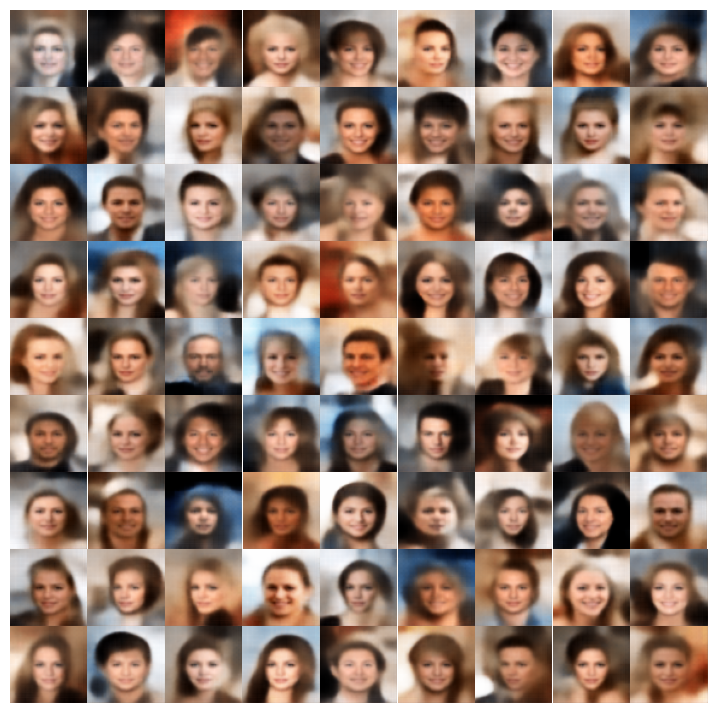

In [19]:
generated_images = vae.decode(random_samples)
fig, ax = plt.subplots(9, 9, figsize=(9, 9))
fig.subplots_adjust(hspace=0, wspace=0)
for i in range(9):
	for j in range(9):
		image = generated_images[i * 9 + j].permute(1, 2, 0).detach().cpu()
		min_val = image.min()
		max_val = image.max()
		image = (image - min_val) / (max_val - min_val)
		ax[i, j].imshow(image)
		ax[i, j].axis('off')
plt.show()

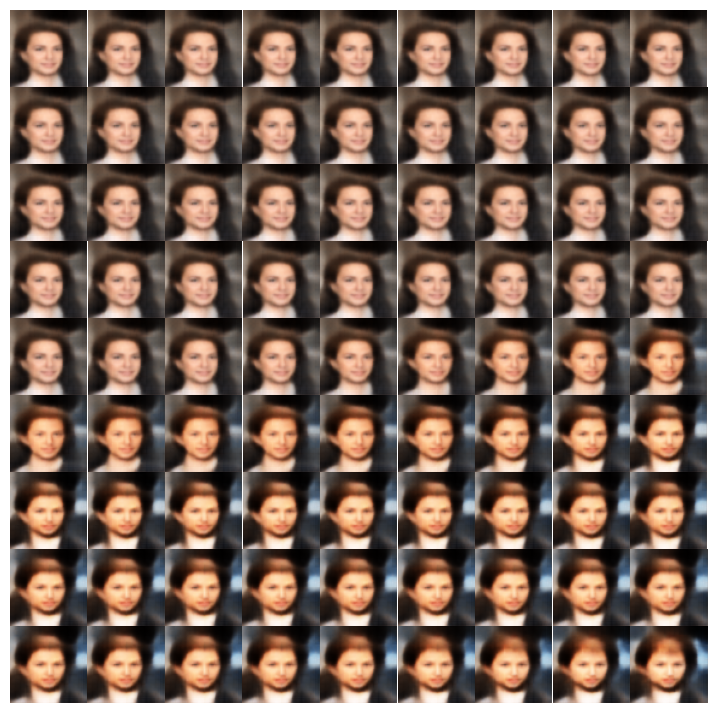

In [21]:
fig, ax = plt.subplots(9, 9, figsize=(9, 9))
fig.subplots_adjust(hspace=0, wspace=0)
for i in range(9):
	for j in range(9):
		adjusted_samples = one_sample
		adjusted_samples[:, vae.latent_dim // 2 + 2 * (i - 9 // 2)] += 2 * 0.1 * j
		outputs = vae.decode(adjusted_samples)
		image = outputs[0].permute(1, 2, 0).detach().cpu()
		min_val = image.min()
		max_val = image.max()
		image = (image - min_val) / (max_val - min_val)
		ax[i, j].imshow(image)
		ax[i, j].axis('off')
plt.show()

In [22]:
gan = GAN().to(device)
gan.load_state_dict(torch.load('../src/model/GAN/CelebA_64_square.pth', map_location=device))
gan.eval()

GAN(
  (generator): Generator(
    (decoder_input): Linear(in_features=128, out_features=2048, bias=True)
    (decoder): Sequential(
      (0): Sequential(
        (0): ConvTranspose2d(512, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), output_padding=(1, 1))
        (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): LeakyReLU(negative_slope=0.01)
        (3): Dropout(p=0.2, inplace=False)
      )
      (1): Sequential(
        (0): ConvTranspose2d(256, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), output_padding=(1, 1))
        (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): LeakyReLU(negative_slope=0.01)
        (3): Dropout(p=0.2, inplace=False)
      )
      (2): Sequential(
        (0): ConvTranspose2d(128, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), output_padding=(1, 1))
        (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_s

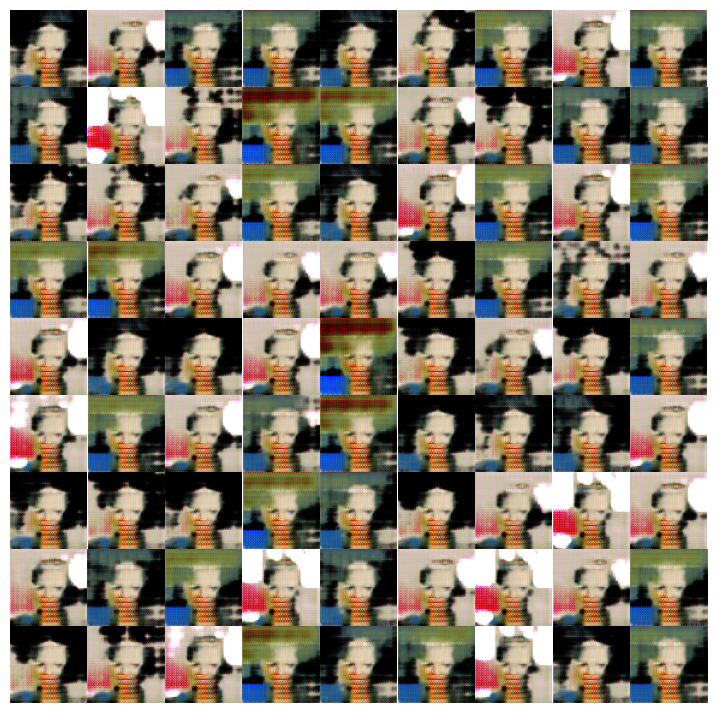

In [23]:
generated_images = gan.generator(random_samples)
fig, ax = plt.subplots(9, 9, figsize=(9, 9))
fig.subplots_adjust(hspace=0, wspace=0)
for i in range(9):
	for j in range(9):
		image = generated_images[i * 9 + j].permute(1, 2, 0).detach().cpu()
		min_val = image.min()
		max_val = image.max()
		image = (image - min_val) / (max_val - min_val)
		ax[i, j].imshow(image)
		ax[i, j].axis('off')
plt.show()

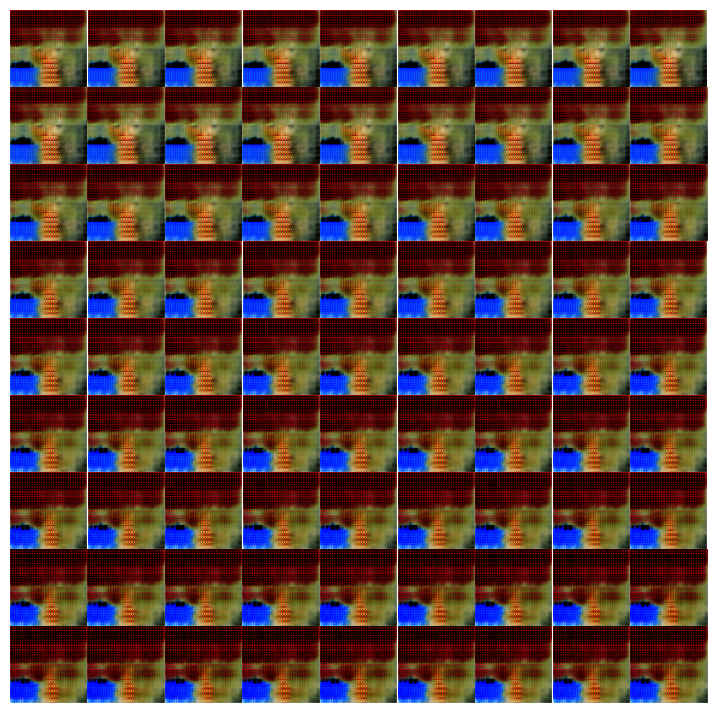

In [24]:
fig, ax = plt.subplots(9, 9, figsize=(9, 9))
fig.subplots_adjust(hspace=0, wspace=0)
for i in range(9):
	for j in range(9):
		adjusted_samples = one_sample
		adjusted_samples[:, gan.latent_dim // 2 + 2 * (i - 9 // 2)] += 2 * 0.1 * j
		outputs = gan.generator(adjusted_samples)
		image = outputs[0].permute(1, 2, 0).detach().cpu()
		min_val = image.min()
		max_val = image.max()
		image = (image - min_val) / (max_val - min_val)
		ax[i, j].imshow(image)
		ax[i, j].axis('off')
plt.show()